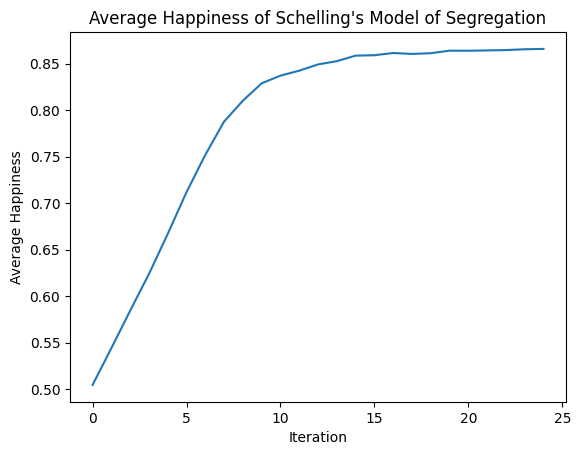

In [63]:
import numpy as np
import matplotlib.pyplot as plt

N = 50

# Create initial lattice with empty spaces (0), and two types of agents (-1 and +1)
lattice = np.random.choice([0, -1, 1], size=(N, N), p=[0.10, 0.45, 0.45])

def unoccupied(lat):
    """Return the coordinates of all unoccupied (0) cells."""
    return np.argwhere(lat == 0)

def is_happy(lat, p):
    """Calculate happiness of the agents and return stats."""
    satisfied = 0
    happy = []
    unhappy = []
    happiness = []

    for i in range(len(lat)):
        for j in range(len(lat)):
            if lat[i, j] != 0:
                neighbors = (lat[(i+1) % N, j],
                             lat[(i-1) % N, j],
                             lat[i, (j+1) % N],
                             lat[i, (j-1) % N],
                             lat[(i-1) % N, (j+1) % N],
                             lat[(i-1) % N, (j-1) % N],
                             lat[(i+1) % N, (j-1) % N],
                             lat[(i+1) % N, (j+1) % N])

                # Only consider non-zero neighbors
                neighbors_arr = np.array(neighbors)
                neighbors_arr = neighbors_arr[neighbors_arr != 0]

                # Skip if there are no valid neighbors (corner case handling)
                if len(neighbors_arr) == 0:
                    continue

                if lat[i, j] == 1:
                    same = np.sum(neighbors_arr == 1)
                    if (same / len(neighbors_arr)) >= p:
                        satisfied += 1
                        happy.append([i, j])
                    else:
                        unhappy.append([i, j])
                    happiness.append(same / len(neighbors_arr))

                elif lat[i, j] == -1:
                    same = np.sum(neighbors_arr == -1)
                    if (same / len(neighbors_arr)) >= p:
                        satisfied += 1
                        happy.append([i, j])
                    else:
                        unhappy.append([i, j])
                    happiness.append(same / len(neighbors_arr))

    # Calculate average happiness (excluding zeros)
    average_happiness = np.sum(happiness) / len(happiness) if happiness else 0

    return satisfied, happy, unhappy, average_happiness

def move(lat, unhappy, unoccupied):
    """Move as many unhappy agents to unoccupied spaces as possible."""
    if len(unhappy) == 0 or len(unoccupied) == 0:
        return lat

    # Shuffle the lists of unhappy agents and unoccupied spaces to ensure randomness
    np.random.shuffle(unhappy)
    np.random.shuffle(unoccupied)

    # Move as many unhappy agents to unoccupied spaces as possible
    for i in range(min(len(unhappy), len(unoccupied))):
        y_unhappy, x_unhappy = unhappy[i]
        y_unoccupied, x_unoccupied = unoccupied[i]

        # Swap the agent and the unoccupied space
        lat[y_unhappy, x_unhappy], lat[y_unoccupied, x_unoccupied] = lat[y_unoccupied, x_unoccupied], lat[y_unhappy, x_unhappy]

    return lat

def run(steps, lattice, p, ave):
    unhappy = []
    unoccupy = unoccupied(lattice)
    
    # Run the simulation for the specified number of steps
    for _ in range(steps):
        sample = is_happy(lattice, p)
        unhappy = sample[2]
        if len(unhappy) == 0:
            break

        lattice = move(lattice, unhappy, unoccupy)
        unoccupy = unoccupied(lattice)
        
        ave.append(sample[3])
        
    return ave

# Initial setup for the simulation
ave_happy = []
steps = 1000
p = 0.5  # Desired threshold for happiness
ave_happy = run(steps, lattice, p, ave_happy)

# Plot the results
plt.plot(ave_happy)
plt.title("Average Happiness of Schelling's Model of Segregation")
plt.xlabel("Iteration")
plt.ylabel("Average Happiness")
plt.show()
